In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from math import log
import scipy.stats

In [2]:
fscore = lambda p, r, b: ((1 + b**2) * (p*r))/ (b**2 * p + r)

In [3]:
N = 10000
itr = 100000
l = list()
for i in range(itr):
    try:
        y = random.randrange(1,N)
        n = N - y
        a = random.randrange(1,y)
        b = random.randrange(1,n)
        cnfx_list = [[y-a, a], [n-b, b]]
        cnfx = np.array(cnfx_list, dtype=np.float64)
        df_cnfx = pd.DataFrame(cnfx, index=["no", "yes"], columns=["negative", "positive"])

        no, yes = df_cnfx.sum(axis=1)
        negative, positive = df_cnfx.sum(axis=0)
        [[tn,fp],[fn,tp]] = cnfx


        prevalence = yes/(yes+no)
        ppv = tp/positive
        npv = tn/negative
        sensitivity = tp/yes
        specificity = tn/no
        f1 = fscore(ppv, sensitivity, 1)


        lr_pos = sensitivity/(1-specificity)
        lr_neg = (1-sensitivity)/specificity
        diagnostic_odds_ratio = lr_pos/lr_neg


        l.append([prevalence, ppv, npv, sensitivity, specificity, f1,
         np.log(lr_pos), np.log(lr_neg), np.log(diagnostic_odds_ratio)])
    except:
        pass

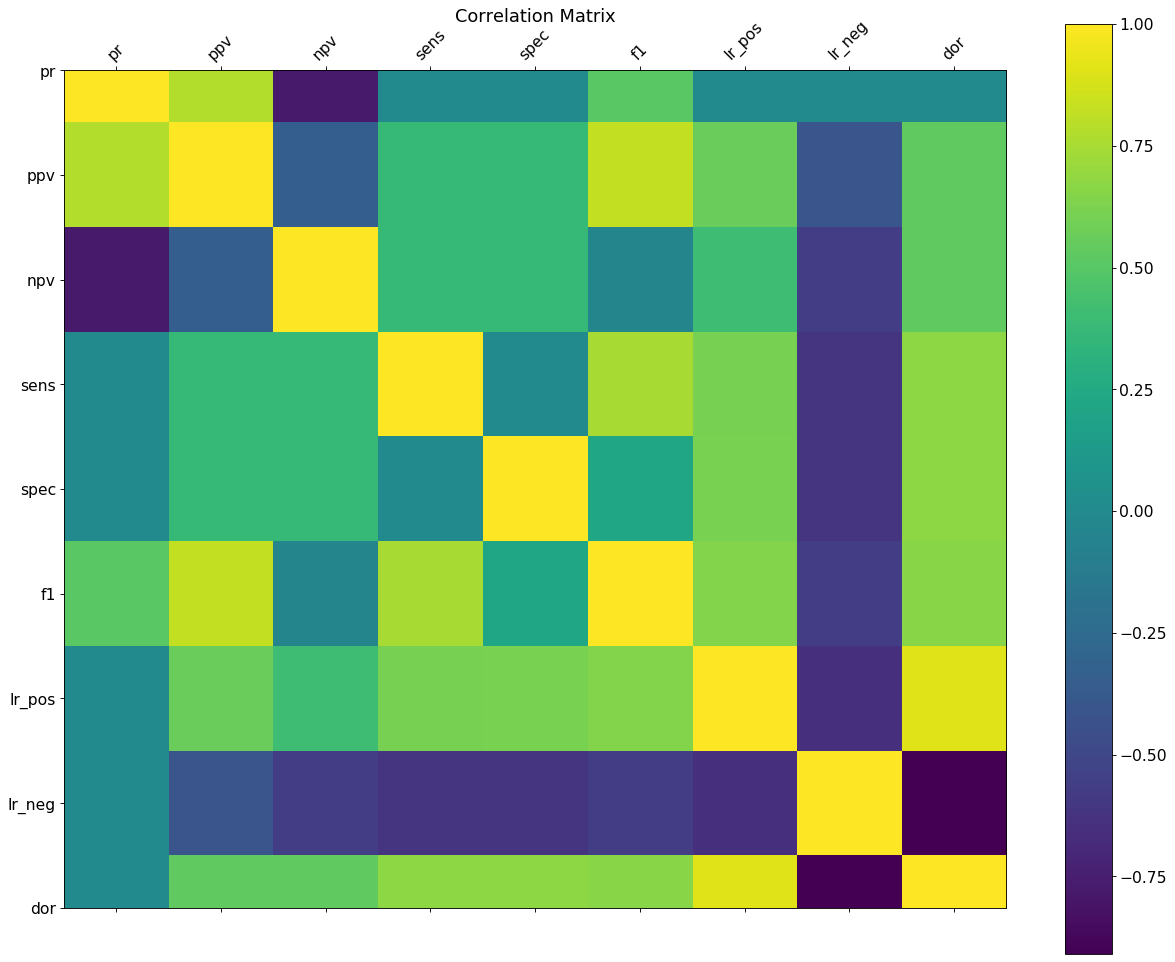

In [4]:
f = plt.figure(num=None, figsize=(19, 15), dpi=80, facecolor='w', edgecolor='k')
df = pd.DataFrame(np.array(l), columns = ["pr", "ppv", "npv", "sens", "spec", "f1", "lr_pos", "lr_neg", "dor"])
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [5]:
print(df.shape)

(99980, 9)


In [6]:

df_cnfx

,negative,positive
no,2679.0,3092.0
yes,1860.0,2369.0


In [7]:
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("no:", no)
print("yes:", yes)
print("negative:", negative)
print("positive:", positive)
print("prevalence", prevalence)
print("precision or positive predictive value:", ppv)
print("negative predictive value:", npv)
print("recall or sensitivity:", sensitivity)
print("specificity:", specificity)
print("f1 score:", f1)
print("positive likelihood ratio (LR+):", lr_pos)
print("negative likelihood ratio (LR-):", lr_neg)
print("positive log likelihood ratio:", np.log(lr_pos))
print("negative log likelihood ratio:", np.log(lr_neg))
print("diagnostic odds ratio:", diagnostic_odds_ratio)
print("diagnostic log odds ratio:", np.log(diagnostic_odds_ratio))

tn: 2679.0
fp: 3092.0
fn: 1860.0
tp: 2369.0
no: 5771.0
yes: 4229.0
negative: 4539.0
positive: 5461.0
prevalence 0.4229
precision or positive predictive value: 0.4338033327229445
negative predictive value: 0.5902181097157965
recall or sensitivity: 0.5601797115157248
specificity: 0.4642176399237567
f1 score: 0.48895768833849335
positive likelihood ratio (LR+): 1.0455359363380492
negative likelihood ratio (LR-): 0.94744415261021
positive log likelihood ratio: 0.04452961168995089
negative log likelihood ratio: -0.053987285598883925
diagnostic odds ratio: 1.1035330509535535
diagnostic log odds ratio: 0.09851689728883475


In [8]:
print(ppv/(1-ppv)) 
print(lr_pos * (prevalence/(1-prevalence)))

0.7661707632600259
0.7661707632600261


In [9]:
print(npv/(1-npv))
print(lr_neg * ((1-prevalence)/prevalence))

1.4403225806451616
1.2929061727863613


In [17]:
def prediction_odds(confusion_matrix, bias = 0.5):
    [[tn,fp],[fn,tp]] = cnfx + bias
    prevalence = (tp + fn)/(tn + fp + fn + tp)
    sensitivity = tp/(tp + fn)
    specificity = tn/(tn + fp)
    lr_pos = sensitivity/(1-specificity)
    lr_neg = (1-sensitivity)/specificity
    dor = log(lr_pos) - log(lr_neg)
    dor_se = (tn**-1 + fp**-1 + fn**-1 + tp**-1)**0.5
    z_scores = dor/dor_se
    pval = scipy.stats.norm.sf(abs(z_scores))*2
    return log(lr_pos), log(lr_neg), pval
     

In [28]:
cnfx_list = [[50000000, 5], [5, 50]]
cnfx = np.array(cnfx_list, dtype=np.float64)
cnfx

array([[5.e+07, 5.e+00],
       [5.e+00, 5.e+01]])

In [29]:
prediction_odds(cnfx)

(15.919407236827821, -2.3206034884967313, 1.0473752667400383e-190)